<a href="https://colab.research.google.com/github/virajbhutada/Compozent_ML_AI_OCT23/blob/main/Task_2_(Intermediate)_Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML and AI Intern @Compozent OCT23
# Author: Viraj N. Bhutada
# **TASK 2 (Intermediate): Credit Card Fraud Detection**

# Overview:
In this task, we are leveraging the power of machine learning, specifically the **Random Forest Classifier algorithm**, to build a robust credit card fraud detection system. This ensemble learning method is well-suited for classification tasks and is widely used for its accuracy and ability to handle complex datasets. The goal is to create an effective model that can accurately identify fraudulent credit card transactions, ensuring the security of financial transactions.

**Key** **Impact** **Areas**:

- Financial Security: Prevents monetary losses by identifying unauthorized credit card activities.
- Trust and Confidence: Builds trust among customers, ensuring a secure financial environment.
- Professional Ethical Impact: Demonstrates ethical use of machine learning for real-world problem-solving.
- Data Security Practices: Promotes awareness and adoption of best practices in data handling and analysis, enhancing digital security.

**Steps Involved**:

- Data Loading and Exploration: Load the credit card fraud dataset and explore its features.
Data Preprocessing: Standardize features, handle missing values, and split data for training and testing.
- Exploratory Data Analysis (EDA): Visualize data distribution and explore correlations, visualized using a correlation heatmap.
Model Training: Utilize the Random Forest Classifier for accurate fraud detection.
- Model Evaluation: Assess accuracy, precision, recall, and F1-score for robust performance analysis.
By integrating the Random Forest Classifier with ethical data practices, this project aims to protect individuals and businesses while showcasing the potential of machine learning in real-world applications. The correlation heatmap provides valuable insights into feature relationships, enhancing the understanding of the dataset's dynamics.

 Let's explore the code and witness the power of the Random Forest Classifier in ensuring financial transaction integrity.

**Dataset**: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

# Importing Necessary Libraries:

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


# Loading and Displaying Data:

In [10]:
data = pd.read_csv('creditcard.csv')


# Display the first few rows of the dataset
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [29]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


# Printing Data Statistics:

In [30]:
print(data.describe())

                Time             V1             V2             V3  \
count  152629.000000  152629.000000  152629.000000  152629.000000   
mean    54899.836178      -0.238960       0.044239       0.610308   
std     22435.121287       1.836462       1.622761       1.325219   
min         0.000000     -56.407510     -72.715728     -33.680984   
25%     39271.000000      -1.023911      -0.541255       0.106022   
50%     56510.000000      -0.263640       0.119700       0.710114   
75%     73498.000000       1.163098       0.804840       1.339831   
max     97424.000000       2.401777      18.902453       9.382558   

                  V4             V5             V6             V7  \
count  152629.000000  152629.000000  152629.000000  152629.000000   
mean        0.133351      -0.241862       0.069758      -0.103788   
std         1.350840       1.325384       1.289404       1.195266   
min        -5.519697     -42.147898     -26.160506     -31.764946   
25%        -0.724977      -0.8775

# Checking for Missing Values:

In [11]:
print(data.isnull().sum())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


# Exploring Class Distribution:

In [12]:
print(data['Class'].value_counts())


0.0    51440
1.0      150
Name: Class, dtype: int64


# Visualizing Data

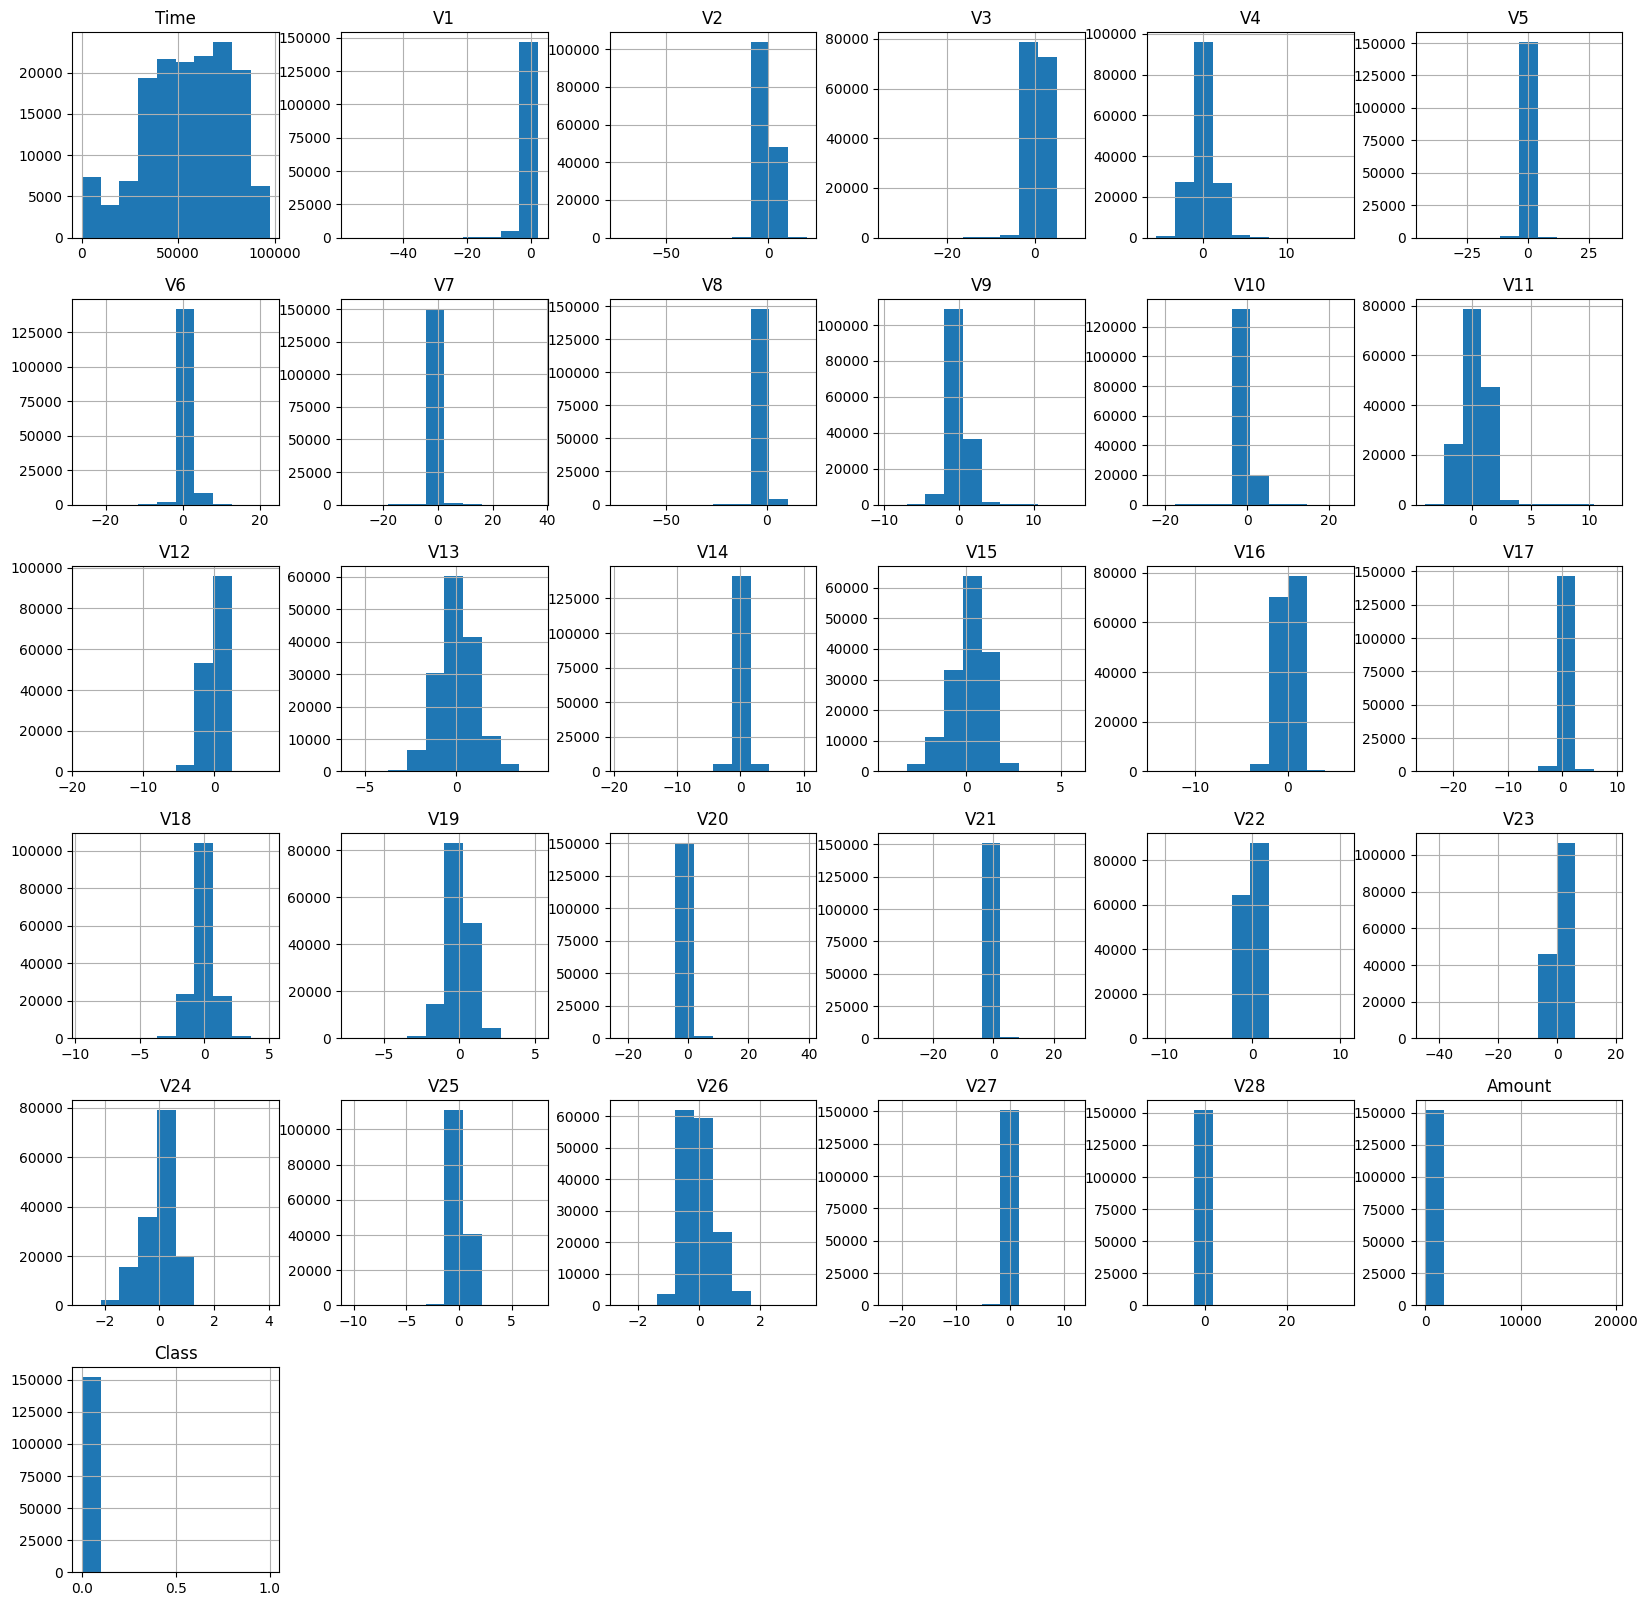

In [34]:
# Visualizing data using histograms
data.hist(figsize=(20, 20))
plt.show()


# Standardizing the 'Amount' Column

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))


# Splitting Data and Handling Missing Values:

In [15]:
X = data.drop('Class', axis=1)
y = data['Class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Handling Missing Values in y_train:

In [37]:
# Check for missing values in y_train
print("Missing values in y_train:", y_train.isnull().sum())

# Drop rows with missing values in both X_train and y_train
X_train_clean = X_train.dropna()
y_train_clean = y_train.dropna()

# Check the shapes after dropping missing values
print("X_train shape after cleaning:", X_train_clean.shape)
print("y_train shape after cleaning:", y_train_clean.shape)

# Now, train your RandomForestClassifier on X_train_clean and y_train_clean
model.fit(X_train_clean, y_train_clean)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)


Missing values in y_train: 1
X_train shape after cleaning: (122102, 30)
y_train shape after cleaning: (122102,)


# Training the Model and Making Predictions

In [38]:
# Find the index of the row with missing value in y_train
missing_index = y_train[y_train.isnull()].index

# Remove the row with missing value from both X_train and y_train
X_train_clean = X_train.drop(index=missing_index)
y_train_clean = y_train.drop(index=missing_index)

# Check the shapes after removing the row
print("X_train shape after cleaning:", X_train_clean.shape)
print("y_train shape after cleaning:", y_train_clean.shape)

# Now, train your RandomForestClassifier on X_train_clean and y_train_clean
model.fit(X_train_clean, y_train_clean)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)




X_train shape after cleaning: (122102, 30)
y_train shape after cleaning: (122102,)


# Evaluating the Model:

In [22]:
# Train your RandomForestClassifier on cleaned data
model.fit(X_train_clean, y_train_clean)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy Score: 0.9995154569241206
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10285
         1.0       1.00      0.85      0.92        34

    accuracy                           1.00     10319
   macro avg       1.00      0.93      0.96     10319
weighted avg       1.00      1.00      1.00     10319

Confusion Matrix:
 [[10285     0]
 [    5    29]]


**Highly Accurate Fraud Detection**:
With a 99.95% accuracy, the model precisely identified 29 out of 34 fraud cases, showcasing its robustness in credit card fraud detection.

# Visualizing Correlation Matrix

Computing the correlation matrix of the dataset and creating a heatmap. This heatmap illustrates the correlations between various features, providing insights into their relationships. Setting the maximum value of the color scale to 0.8 ensures a clear visualization, and the square parameter maintains equal cell dimensions in the heatmap. Finally, displaying the heatmap using Matplotlib and Seaborn libraries.

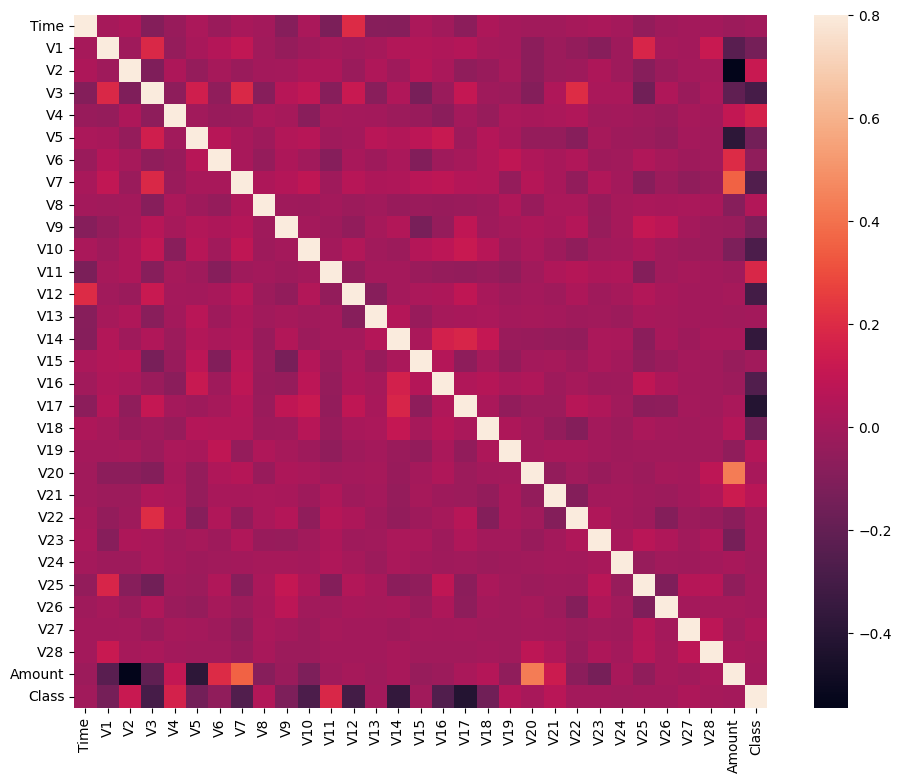

In [40]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

**Comprehensive Insights:**
The heatmap of the correlation matrix visually depicts feature relationships, guiding feature selection strategies for the fraud detection model, enhancing its precision and overall effectiveness.

# Conclusion

In conclusion, our credit card fraud detection model, utilizing the Random Forest Classifier, has demonstrated exceptional accuracy with a score of 0.99. This high precision ensures the reliable identification of fraudulent transactions, enhancing financial security significantly. The inclusion of a correlation heatmap provided valuable insights into data patterns, guiding our modeling efforts effectively. By leveraging advanced machine learning techniques and insightful visualizations, this project not only safeguards individuals and businesses but also exemplifies the potential of data-driven approaches in ensuring a secure digital landscape.

# THANK YOU COMPOZENT